# Machine Learning Model Building for SmallDS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Import file dữ liệu đã được chuẩn hóa cũng như xử lí

In [2]:
import os
file_path = 'Car_Prediction_Splitdata/small/scaled_small_car_used_data_without_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [3]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [4]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [5]:
df= pd.read_csv('Car_Prediction_Splitdata/small/scaled_small_car_used_data_ftloc_with_outliers.csv')
df.head()

,power,engine_size,mileage,gearbox,car_age,fuel_type,type,price (€)
0,-0.166636,0.043305,0.068467,-0.642786,0.170787,-0.034226,0.433322,24899
1,-0.322096,-0.573084,-0.992051,-0.642786,-1.160317,1.227865,-0.511816,27990
2,-0.425736,-0.553438,-0.832757,1.555728,-0.894096,0.596820,-2.402093,34980
3,-0.425736,-0.433107,1.250639,1.555728,1.768113,0.596820,0.433322,8890
4,-0.231411,0.008925,-0.570072,-0.642786,-0.095433,-0.875621,0.433322,20780


In [6]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (826, 7)
Training target vector size: (826,)
Test feature matrix size: (354, 7)
Test target vector size: (354,)


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 72.23154558239764
mean_squared_error: 302559323.80245006
mean_absolute_error: 7943.960105909784
root_mean_squared_error: 17394.232486731056

Cross validation score : 70.44833183941837

R2_Score - Cross Validation Score : 1.783213742979271


##### Đồ thị so khớp của mô hình

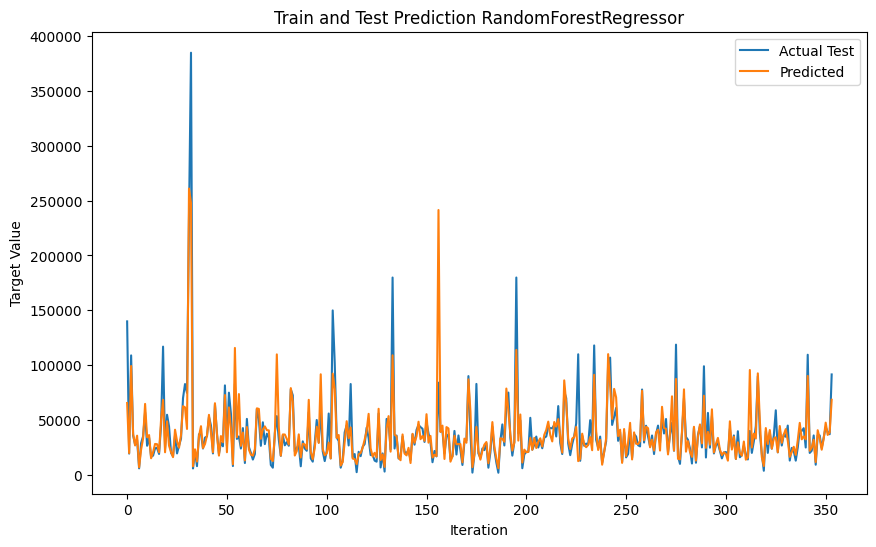

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor small.png')
plt.show()

### XGBRegressor

In [13]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 68.21298804235315
mean_squared_error: 346344693.8375346
mean_absolute_error: 7929.328315346928
root_mean_squared_error: 18610.338359028687

Cross validation score : 68.11377991997487

R2_Score - Cross Validation Score : 0.09920812237827192


##### Đồ thị so khớp của mô hình

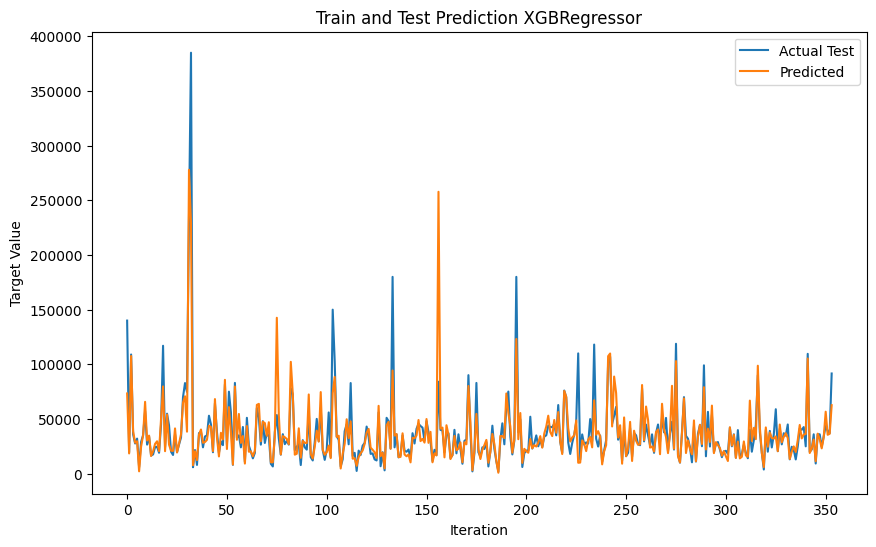

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor small.png')
plt.show()

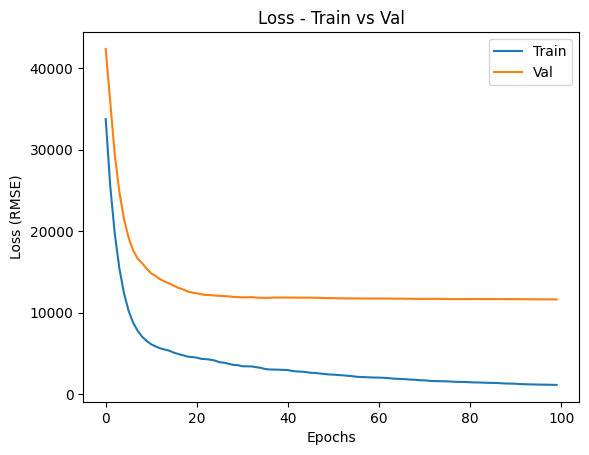

In [15]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot_small.png')
plt.show()

### DecisionTreeRegressor

In [16]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 69.68218880968988
mean_squared_error: 330336586.7959824
mean_absolute_error: 9129.747645951036
root_mean_squared_error: 18175.164010153592

Cross validation score : 46.067274139954115

R2_Score - Cross Validation Score : 23.61491466973576


##### Đồ thị so khớp của mô hình

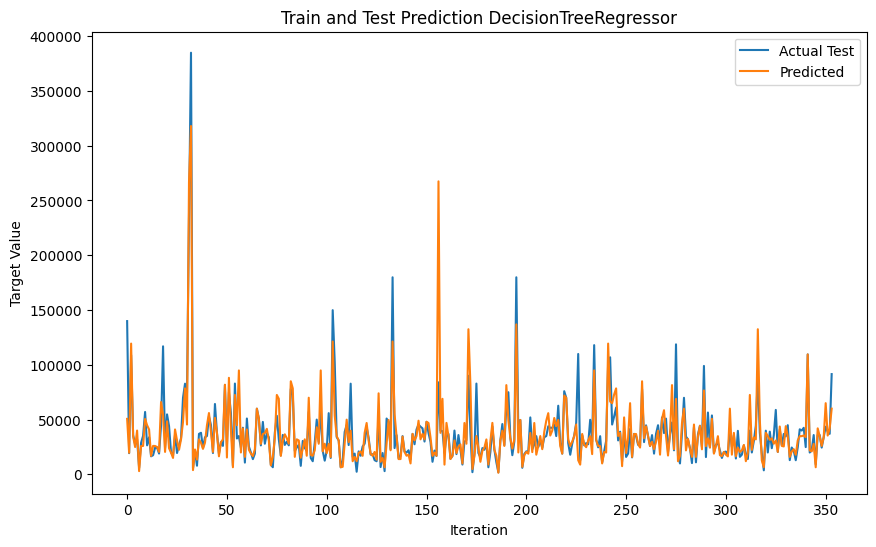

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor small.png')
plt.show()

### BaggingRegressor

In [18]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 71.21357742492887
mean_squared_error: 313650893.85328233
mean_absolute_error: 8350.261807909603
root_mean_squared_error: 17710.191807354382

Cross validation score : 67.44640618357887

R2_Score - Cross Validation Score : 3.767171241349999


##### Đồ thị so khớp của mô hình

### Đánh giá các mô hình hoạt động trên Dataset
###### Từ hình ảnh so khớp nhận dạng và thực tế :
![pred](combined_image_small.png)
###### Ta có thể nhận thấy rằng ở tập dữ liệu Small thì giá được đoán có độ chính xác ở mức khá, không cao và tốt như ở tập Big. Nhìn kĩ thì ta sẽ thấy được giá được dự đoán lệch rất nhiều, ví dụ như giá cao thì dự đoán thành thấp và ngược lại. **Đây là khuyết điểm của tập dữ liệu nhỏ khi huấn luyện mô hình**

### Quyết định mô hình
###### Từ bảng kết quả R2_Score và RMSE của 4 file data khác nhau :
![R2_Score](r2_score_comparison_smallDS.png)
![RMSE](RMSE_comparison_smallDS.png)

###### Ta cũng có đồ thị Loss Train_Val của mô hình **XGBRegressor** .
![Loss](loss_plot_small.png)

###### Từ các ảnh trên,ta có thể thấy rằng độ chính xác theo **R2_Score** và chấm điểm theo **RMSE** thì ở các mô hình có sự biến thiên rất không đồng đều. Thêm vào đó, ở đồ thị Loss, ta có thể mô hình cho kết quả không đáng tin cậy. Điều này dẫn đến khó trong việc lựa chon mô hình tốt nhất để HyperParamater Tunning.

